In [117]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf

df_us = pd.read_csv('us.csv')
hist = yf.Ticker('^GSPC').history(start='2019-01-21')
df_us['date'] = pd.to_datetime(df_us['date'])
df_us = df_us.set_index('date')




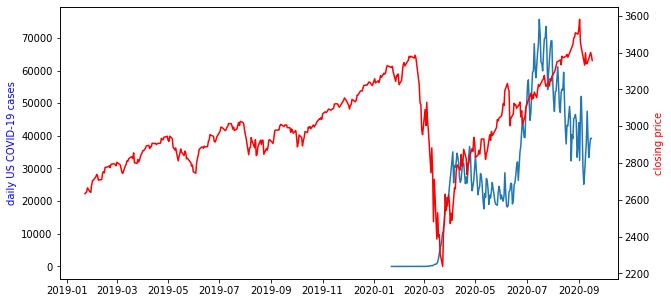

In [125]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(df_us['cases'].diff())
ax.set_ylabel('daily US COVID-19 cases', color='blue')
ax2 = ax.twinx()
sc = ax2.plot(hist['Close'], color='red')
ax2.set_ylabel('closing price', color='red')
plt.show()

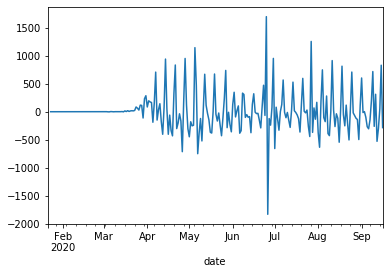

In [52]:
df_us['deaths'].diff().diff().plot()

In [106]:
x = hist['Close'].diff()
y = df_us['cases'].diff().diff()
data = pd.DataFrame({'change in closing price': x, 'change in cases per day': y})

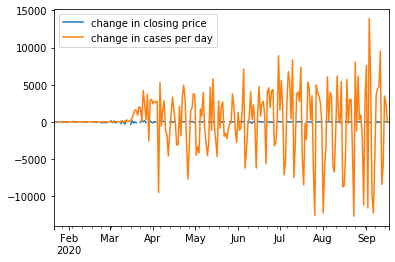

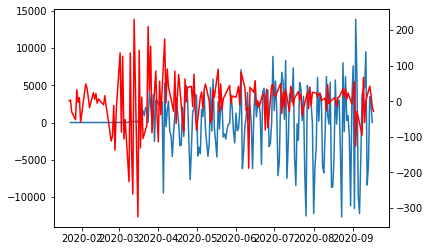

In [111]:
data.plot()
fig, ax = plt.subplots()

ax.plot(df_us['cases'].diff().diff())
ax2 = ax.twinx()
sc = ax2.plot(hist['Close'].diff(), color='red')
plt.show()

C:\Users\rayen\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


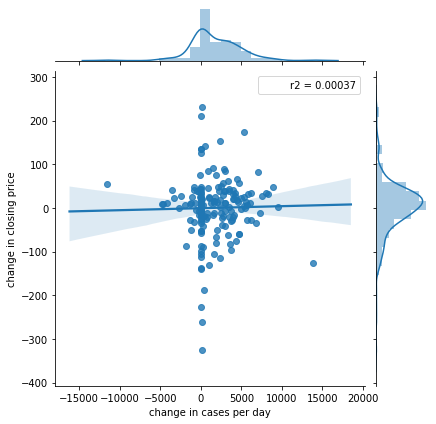

In [107]:
from scipy import stats
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2

sns.jointplot(y='change in closing price', x = 'change in cases per day', data=data, kind="reg", stat_func=r2)